In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

#import time library and the datetime module
import time
from datetime import datetime

#import requests and api key
import requests
from config import weather_api_key

In [2]:
#create a set  of random lat and long combos
#-------------------------CHANGE SIZE TO 1500 BEFORE SUBMISSION----------------------------
lats = np.random.uniform(low=-90.000,high=90.000,size=150)
lngs = np.random.uniform(low=-180.000,high=180.000,size=150)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
#get lat and long combo in sets
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

35.10584830819947 72.73466105153673
-53.5088799334028 -116.7773182581007
-25.287231316615035 130.18394059402624
18.934323321250815 -20.02057781972249
-70.71748608449906 -11.282176603054381
-45.54677128298346 -126.76860207673093
38.66958019598417 -15.444654403298557
28.50952124821299 170.3097515923397
12.008792798802062 -143.9615314141181
-79.24234863299239 -126.93226762524014
-31.74484909906419 164.39953822418198
33.6350142352278 -82.39198718095177
78.91429055425772 -102.09565485610504
61.8271605245875 -41.7501539182166
0.5887815497987958 99.05085163733673
0.6909200965033477 111.821062197314
13.875028759355772 -35.315078544291964
23.64116389687281 -76.66952010373636
-60.15675388403023 124.52438168853547
-69.79919282277407 -133.25469174167037
27.80229106704614 -179.50122958033901
-15.797632224147804 -131.63850750802132
54.95158418532077 14.570860014814684
25.593309678025378 5.028700465681538
-86.00067341404026 -13.111974519266852
-8.614264463974493 -156.66682031052488
71.27932028986262 

In [5]:
#create list for holding the cities
cities = []

#identify nearest city for each lat and long combo

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if city is unique, add to list
    if city not in cities:
        cities.append(city)
        
#print city count and confirm sufficiency
len(cities)

109

In [6]:
#build the url
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

#create list for holding the cities
city_data = []

#print beginning of logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

#NOTA BENE: we need to iterate through our list of cities and begin building the URL for each city, while grouping our records in sets of 50.
#o do this, use for i in range(len(cities)) and the index to tell us when we get to 50. Once we get to 50, we tell the program to pause for 60 seconds using the time.sleep(60) command. The OpenWeatherMap API only allows 60 calls for per minute on their free tier, so pausing our program for one minute after each set of 50 will prevent time-out errors. We can also retrieve the city from the cities list and add it to the city_url by using indexing,
#as shown in the following code:

#loop through all cities in our list
for i,city in enumerate (cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    #create endpoint url for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to record count
    record_count +=1

    #run api request for each city
    try:
        #parse json and retrieve data
        city_weather = requests.get(city_url).json()

        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        #convert data in ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        #append city data to city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #if error occur, skip city
    except:
        print("City not found. Skipping...")
        pass

#indicate data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mingaora
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | yulara
Processing Record 4 of Set 1 | nouadhibou
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | camacha
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | ahipara
Processing Record 10 of Set 1 | evans
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | sibolga
Processing Record 14 of Set 1 | sri aman
Processing Record 15 of Set 1 | porto novo
Processing Record 16 of Set 1 | rock sound
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | ronne
Processing Record 20 of Set 1 | gat
Processing Record 21 of Set 1 | faanui
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 | svetlaya
Processing Record

In [7]:
len(city_data)

101

In [8]:
#convert array of dictionaries to Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mingaora,34.7758,72.3625,16.95,67,79,3.50,PK,2022-10-03 22:10:10
1,Rikitea,-23.1203,-134.9692,21.65,71,90,7.86,PF,2022-10-03 22:09:46
2,Yulara,-25.2406,130.9889,16.15,71,59,4.21,AU,2022-10-03 22:10:10
3,Nouadhibou,20.9310,-17.0347,25.01,70,67,6.54,MR,2022-10-03 22:06:31
4,Cape Town,-33.9258,18.4232,14.49,73,0,0.45,ZA,2022-10-03 22:06:25
5,Camacha,33.0833,-16.3333,18.68,77,20,1.54,PT,2022-10-03 22:06:31
6,Butaritari,3.0707,172.7902,27.54,73,28,4.79,KI,2022-10-03 22:10:10
7,Hilo,19.7297,-155.0900,29.58,79,20,4.63,US,2022-10-03 22:09:54
8,Ahipara,-35.1667,173.1667,14.45,71,74,4.16,NZ,2022-10-03 22:10:11
9,Evans,33.5337,-82.1307,22.21,59,40,2.57,US,2022-10-03 22:10:12


In [9]:
#re-arrange the column headers
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mingaora,PK,2022-10-03 22:10:10,34.7758,72.3625,16.95,67,79,3.50
1,Rikitea,PF,2022-10-03 22:09:46,-23.1203,-134.9692,21.65,71,90,7.86
2,Yulara,AU,2022-10-03 22:10:10,-25.2406,130.9889,16.15,71,59,4.21
3,Nouadhibou,MR,2022-10-03 22:06:31,20.9310,-17.0347,25.01,70,67,6.54
4,Cape Town,ZA,2022-10-03 22:06:25,-33.9258,18.4232,14.49,73,0,0.45
5,Camacha,PT,2022-10-03 22:06:31,33.0833,-16.3333,18.68,77,20,1.54
6,Butaritari,KI,2022-10-03 22:10:10,3.0707,172.7902,27.54,73,28,4.79
7,Hilo,US,2022-10-03 22:09:54,19.7297,-155.0900,29.58,79,20,4.63
8,Ahipara,NZ,2022-10-03 22:10:11,-35.1667,173.1667,14.45,71,74,4.16
9,Evans,US,2022-10-03 22:10:12,33.5337,-82.1307,22.21,59,40,2.57


In [10]:
#create the output csv file
output_data_file = "weather_data\cities.csv"

#export the city_data into the csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [11]:
#extract relevant fields from the Dframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

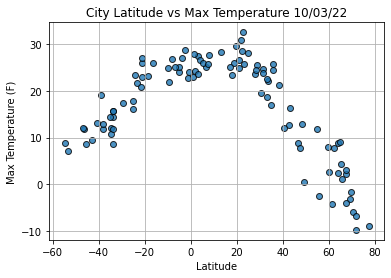

In [12]:
#import time module
import time

#build scatter plot for lat vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the image
plt.savefig("weather_data\Fig1.png")

#display the chart
plt.show()

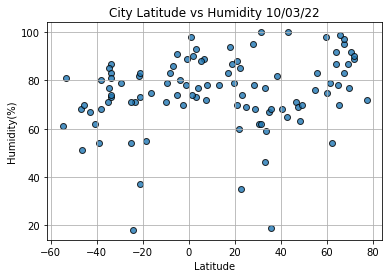

In [13]:
#import time module
import time

#build scatter plot for lat vs humidity
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the image
plt.savefig("weather_data\Fig2.png")

#display the chart
plt.show()

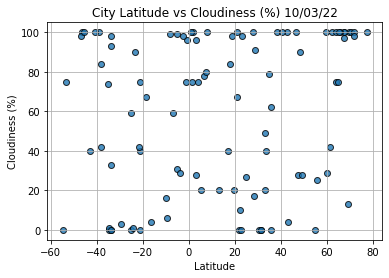

In [14]:
#build scatter plot for lat vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the image
plt.savefig("weather_data\Fig3.png")

#display the chart
plt.show()

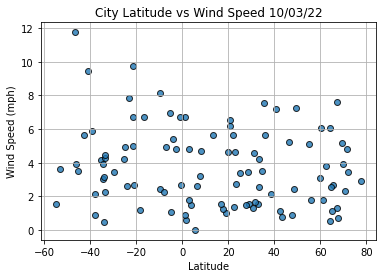

In [15]:
#build scatter plot for lat vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the image
plt.savefig("weather_data\Fig4.png")

#display the chart
plt.show()

In [16]:
#import linear regression from scipy stats module
from scipy.stats import linregress

In [17]:
#create function to create perform linear regression on weather data
#and plot regression line and eq with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run linear regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #get the eq of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #create scatter plot and plot regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #annotate the text for the line eq
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
#show info at index 13 in the city_data df
index13 = city_data_df.loc[13]
index13

City                     Sri Aman
Country                        MY
Date          2022-10-03 22:10:13
Lat                        1.2376
Lng                      111.4621
Max Temp                    22.92
Humidity                       98
Cloudiness                    100
Wind Speed                   0.88
Name: 13, dtype: object

In [19]:
#creating a df for northern hemisphere (lat >=0) and southern hemisphere (lat <0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

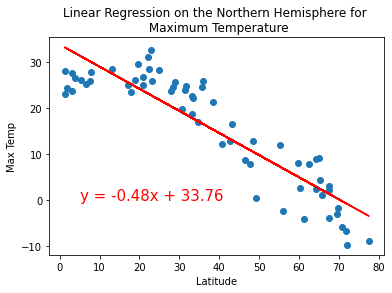

In [20]:
#perform linear regression on northern hemi on max temp
#set the values/params before calling the method defined above

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n Maximum Temperature', 'Max Temp',(5,0))

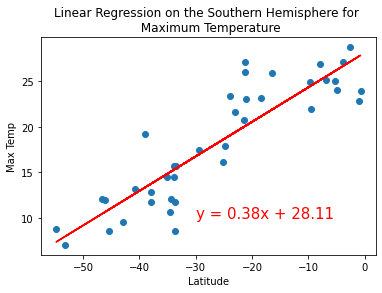

In [21]:
#perform linear regression on southern hemi on max temp
#set the values/params before calling the method defined above

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n Maximum Temperature', 'Max Temp',(-30,10))

# FINDINGS:
The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

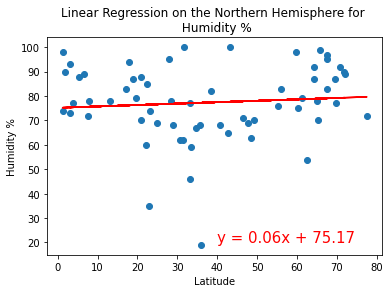

In [29]:
#perform linear regression on northern hemi on humidity
#set the values/params before calling the method defined above

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n Humidity %', 'Humidity %',(40,20))

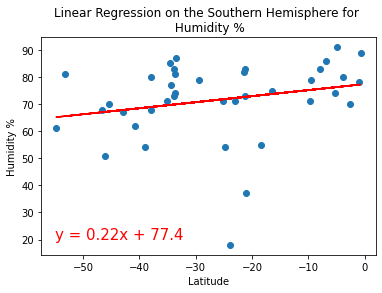

In [23]:
#perform linear regression on southern hemi on humidity
#set the values/params before calling the method defined above

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n Humidity %', 'Humidity %',(-55,20))

# FINDINGS:
The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

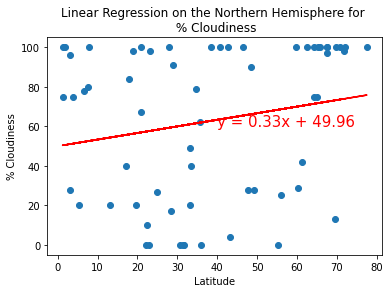

In [24]:
#perform linear regression on northern hemi on cloudiness
#set the values/params before calling the method defined above

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n % Cloudiness', '% Cloudiness',(40,60))

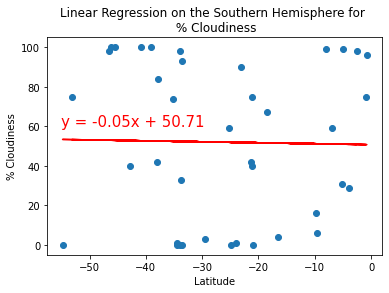

In [25]:
#perform linear regression on southern hemi on cloudiness
#set the values/params before calling the method defined above

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n % Cloudiness', '% Cloudiness',(-55,60))

# Findings:
The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

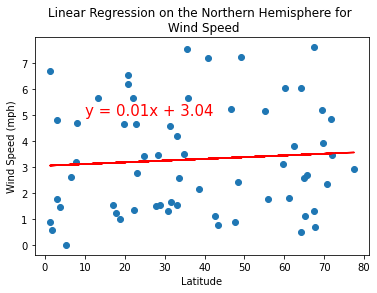

In [30]:
#perform linear regression on northern hemi on wind speed
#set the values/params before calling the method defined above

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n Wind Speed', 'Wind Speed (mph)',(10,5))

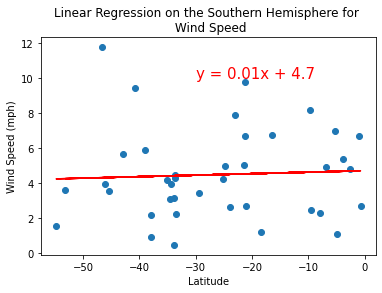

In [27]:
#perform linear regression on southern hemi on wind speed
#set the values/params before calling the method defined above

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n Wind Speed', 'Wind Speed (mph)',(-30,10))

# FINDINGS:
The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 